In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
import utils_tarea
from sklearn.metrics import f1_score

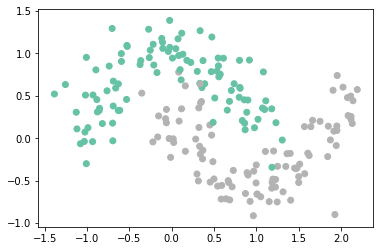

In [14]:
#Definimos nuestro test y train set
noise= .2
X,y=make_moons(200,noise=noise,random_state=2718)
X_test,y_test=make_moons(40,noise=noise,random_state=31415)
plt.scatter(*X.T,c=y,cmap="Set2")

In [15]:
#Definimos los modelos que queremos entrenar (Primero transformamos en un polinomio grado 30 y despues aplicamos
#regresion logistica)
polynomial_features=PolynomialFeatures(degree=30,include_bias=False)
model=Pipeline([("polynomial_features",polynomial_features),
               ("linreg", LogisticRegression(penalty="none"))])

In [16]:
#A nuestro modelo le aplicamos Bagging
bagging_logreg = BaggingClassifier(base_estimator = model, 
                          n_estimators = 100, 
                          random_state = 314) 

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
#Entrenamos ambos modelos
model.fit(X, y)
bagging_logreg.fit(X, y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('polynomial_features',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('linreg',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                            

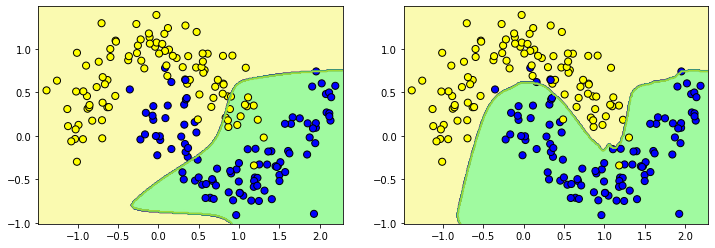

In [29]:
#Graficamos la funcion de decision de ambos modelos y notamos que Bagging hace un mejor trabajo al clasificar nuestros datos
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils_tarea.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils_tarea.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

In [30]:
#Evaluamos que tan accurate son neustros modelos con un f1_score, este se determina utilizando precision y recall
model_score = f1_score(y_test, model.predict(X_test))
logreg_score= f1_score(y_test,bagging_logreg.predict(X_test))

In [31]:
# Podemos notar que Bagging es mejor que model, lo cual significa que su recall y precision son mayores y que es un modelo 
#mas accurate.
print(f'f1 score para model: {"{0:.4f}".format(model_score)} y para bagging_logreg: {"{0:.4f}".format(logreg_score)}')

f1 score para model: 0.7568 y para bagging_logreg: 0.9500
